In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv("INvideos.csv", encoding='latin1')  # change path if needed

In [3]:
print("Columns:", df.columns)
print(df[['title', 'views', 'likes', 'comment_count']].head())

Columns: Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description'],
      dtype='object')
                                               title    views  likes  \
0  Sharry Mann: Cute Munda ( Song Teaser) | Parmi...  1096327  33966   
1  à¤ªà¥à¤°à¤¿à¤¯à¤¡à¥à¤¸ à¤à¥ à¤¸à¤®à¤¯, à¤ª...   590101    735   
2  Stylish Star Allu Arjun @ ChaySam Wedding Rece...   473988   2011   
3                     Eruma Saani | Tamil vs English  1242680  70353   
4  why Samantha became EMOTIONAL @ Samantha naga ...   464015    492   

   comment_count  
0            882  
1              0  
2            149  
3           2684  
4             66  


In [4]:
df = df.dropna(subset=['views', 'likes', 'comment_count'])

In [7]:
df = df[df['views'] < df['views'].quantile(0.95)]

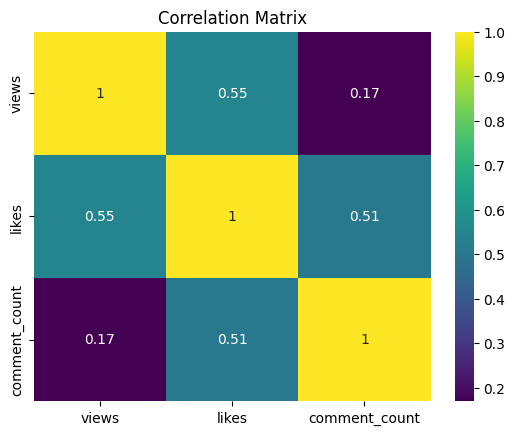

In [8]:
sns.heatmap(df[['views', 'likes', 'comment_count']].corr(), annot=True, cmap='viridis')
plt.title("Correlation Matrix")
plt.show()

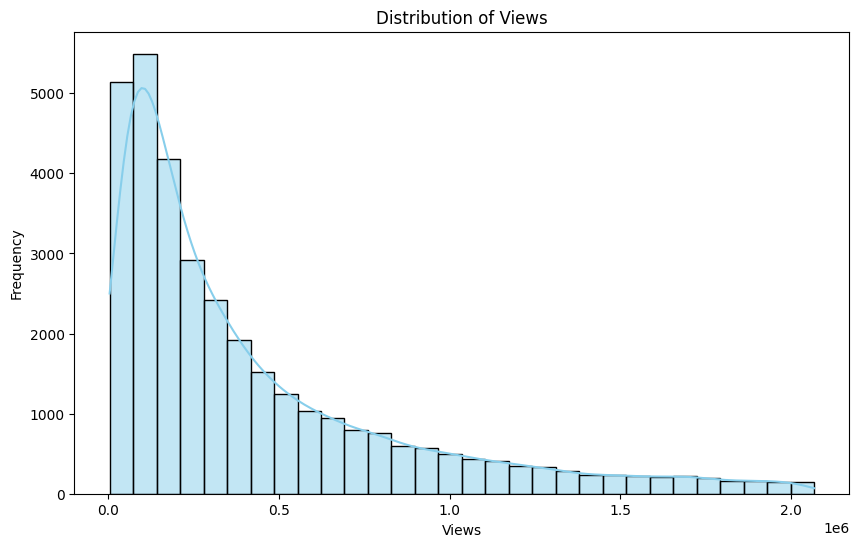

In [17]:
plt.figure(figsize=(10, 6))
sns.histplot(df['views'], bins=30, kde=True, color='skyblue')
plt.title("Distribution of Views")
plt.xlabel("Views")
plt.ylabel("Frequency")
plt.show()

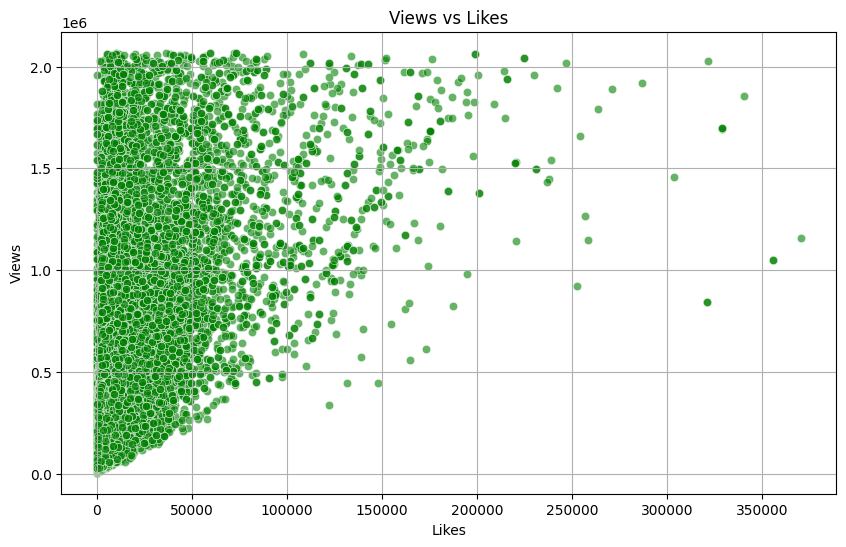

In [18]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='likes', y='views', data=df, alpha=0.6, color='green')
plt.title("Views vs Likes")
plt.xlabel("Likes")
plt.ylabel("Views")
plt.grid(True)
plt.show()

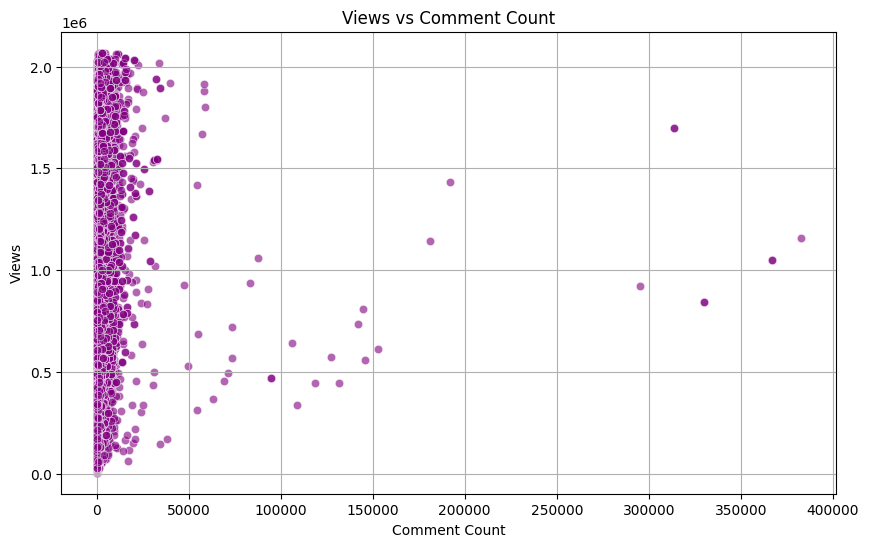

In [19]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='comment_count', y='views', data=df, alpha=0.6, color='purple')
plt.title("Views vs Comment Count")
plt.xlabel("Comment Count")
plt.ylabel("Views")
plt.grid(True)
plt.show()

In [9]:
X = df[['likes', 'comment_count']]
y = df['views']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [12]:
y_pred = model.predict(X_test)

In [13]:
print("R-squared Score:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

R-squared Score: 0.30193911633728343
Mean Squared Error: 139772149560.0338


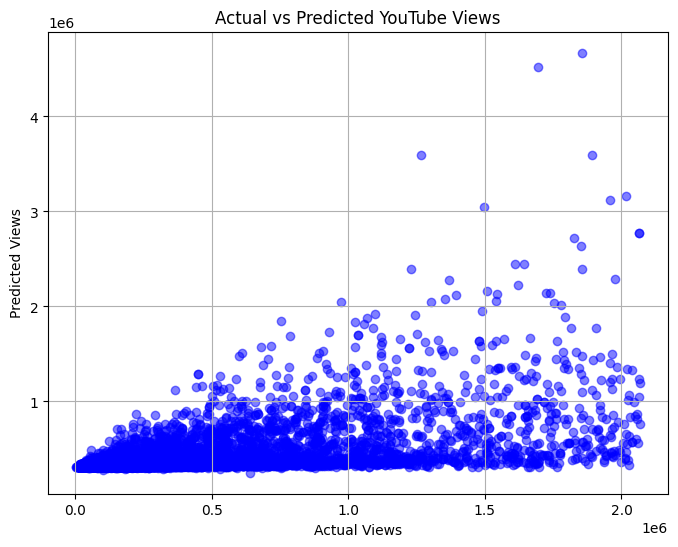

In [14]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.xlabel("Actual Views")
plt.ylabel("Predicted Views")
plt.title("Actual vs Predicted YouTube Views")
plt.grid(True)
plt.show()

In [15]:
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})
print("\nModel Coefficients:")
print(coef_df)


Model Coefficients:
         Feature  Coefficient
0          likes    12.953497
1  comment_count   -10.128803


In [16]:
new_video = pd.DataFrame({
    'likes': [20000],
    'comment_count': [800]
})
predicted_views = model.predict(new_video)
print(f"\nPredicted Views for new video: {int(predicted_views[0])}")



Predicted Views for new video: 558672
